In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import shap
from sklearn.ensemble import RandomForestRegressor

/home/ethan/anaconda3/envs/automation-project-2024/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Ideas:

 - PCA and plotting of principal components
 - feature importance on a simple random forest to indicate if there are main informative features or well distributed
 - pairwise plots (correlation btwn features)
 


In [11]:
X = np.load('X.npy')
X = pd.DataFrame(X,columns='Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight'.split(','))
y = np.load('y.npy')
y = pd.DataFrame(y)
y = y[0]
X

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,0.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,1.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,0.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,2.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,1.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,0.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,0.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,1.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


# Pairplot of features to show correlation

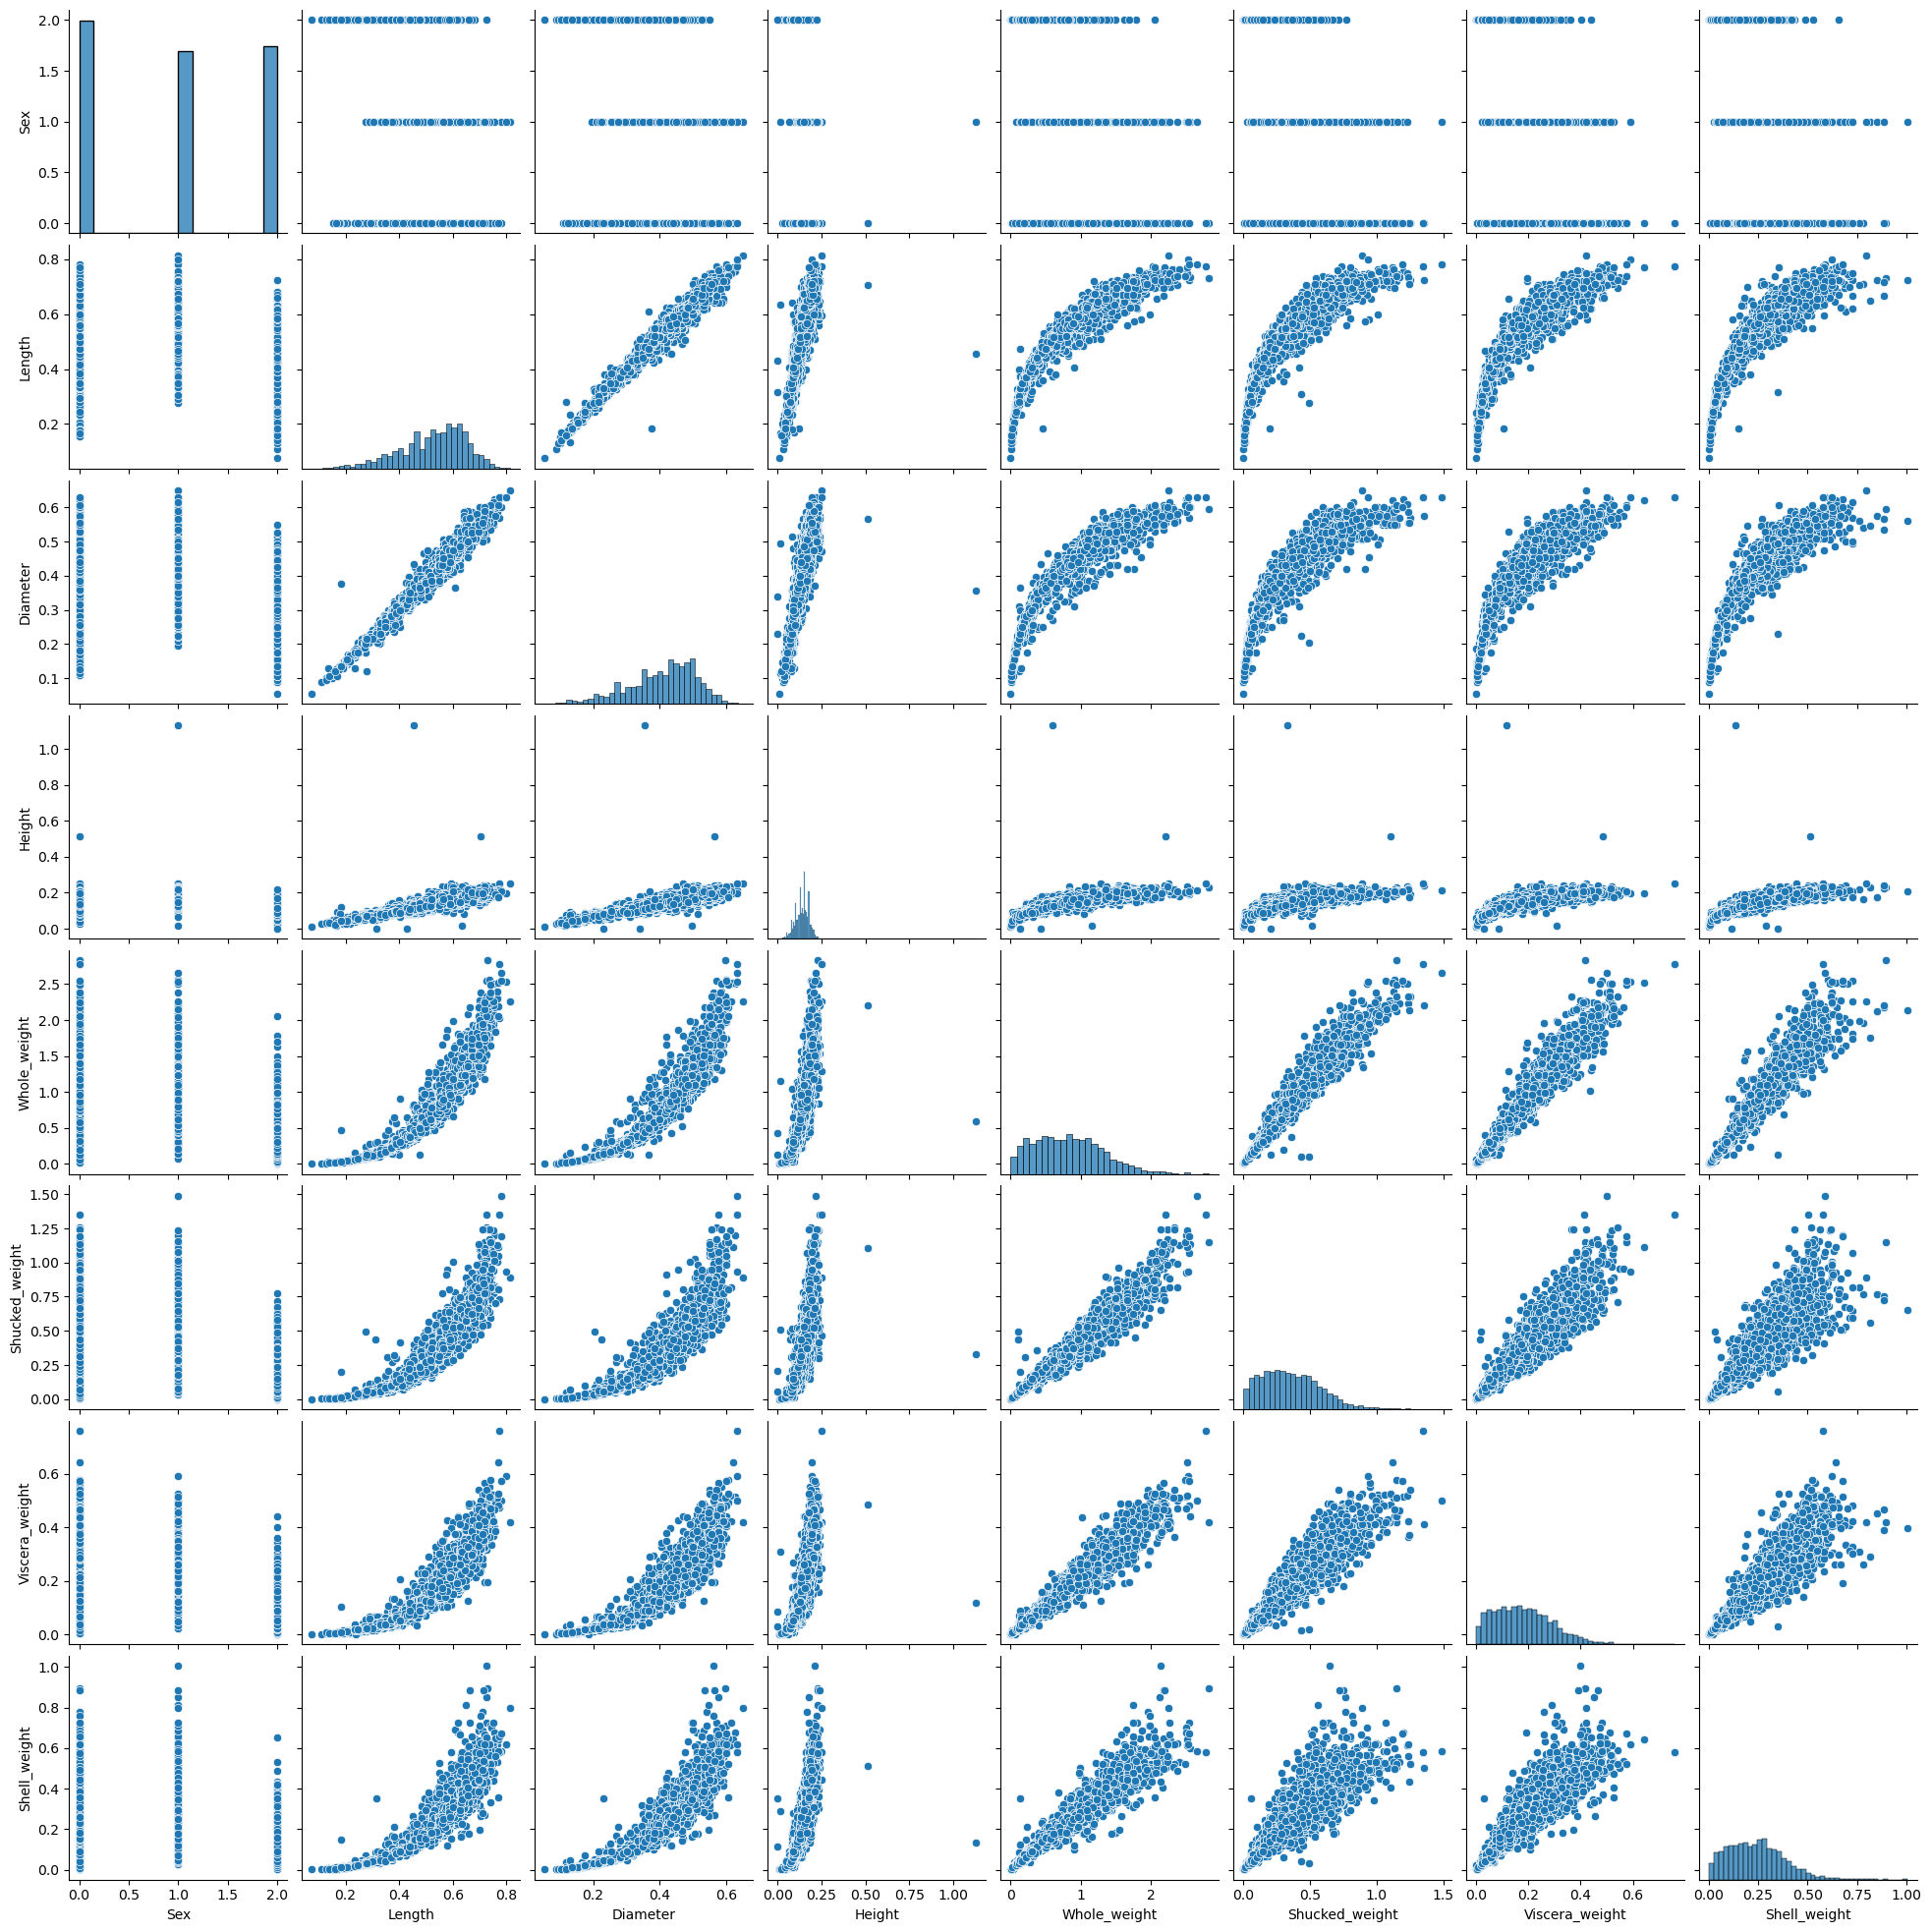

In [ ]:
sns.pairplot(X)

# PCA and visualization of 1st 2 principal components

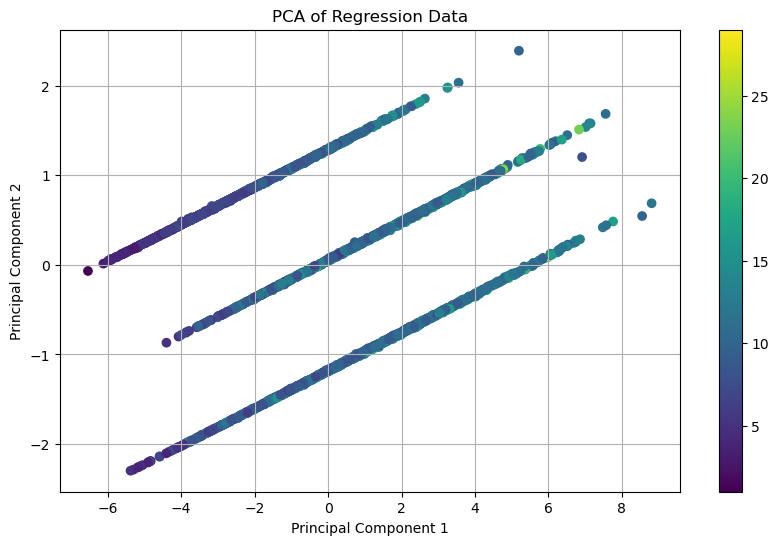

In [5]:
#scale X to make PCA better
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#pca
pca = PCA(n_components=2) 
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
principal_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
final_df = pd.concat([principal_df, y], axis=1)

#plot and color points based on y
plt.figure(figsize=(10, 6))
plt.scatter(final_df['PC1'], final_df['PC2'], c=y, cmap='viridis')
plt.title('PCA of Regression Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.grid(True)
plt.show()

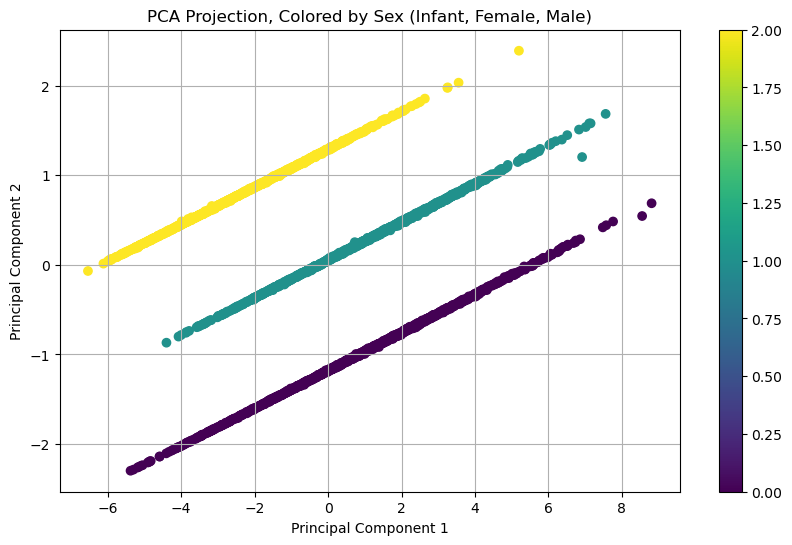

In [14]:
#plot and color points based on y
plt.figure(figsize=(10, 6))
plt.scatter(final_df['PC1'], final_df['PC2'], c=X['Sex'], cmap='viridis')
plt.title('PCA Projection, Colored by Sex (Infant, Female, Male)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.grid(True)
plt.show()

In [8]:
n_components=2
pca = PCA(n_components=n_components)
pca.fit(X_scaled) 
print(f'n_components={n_components}: sum(pca.explained_variance_ratio_)={sum(pca.explained_variance_ratio_)}')
while sum(pca.explained_variance_ratio_) < 0.9:
    print(f'n_components={n_components}: sum(pca.explained_variance_ratio_)={sum(pca.explained_variance_ratio_)}')
    #pca
    pca = PCA(n_components=n_components) 
    pca.fit(X_scaled)
    n_components += 1
# print(f"BEST: n_components={n_components-1}")
X_pca = pca.transform(X_scaled)

n_components=2: sum(pca.explained_variance_ratio_)=0.9194169477921268


# feature importance

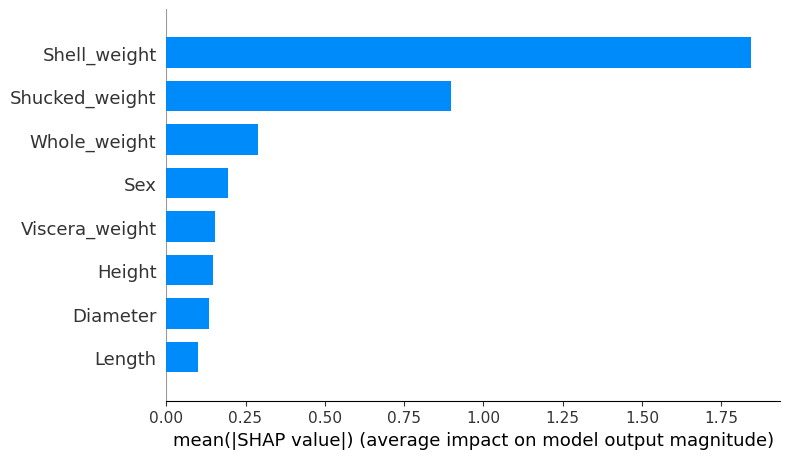

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Initialize a SHAP explainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values
explanation = explainer(X)
shap_values = explanation.values

# Summary plot of feature importances
shap.summary_plot(shap_values, X,feature_names=X.columns, plot_type="bar")

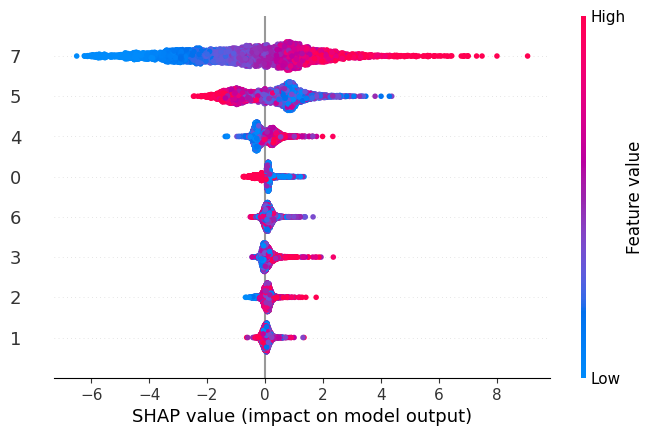

In [ ]:
shap.plots.beeswarm(explanation)

# Correlation

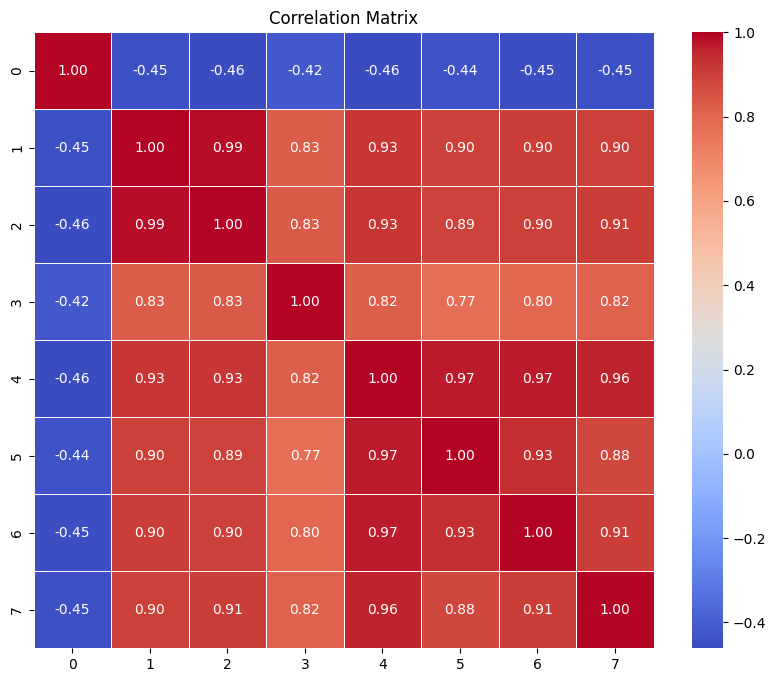

In [ ]:
correlation_matrix = X.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Distribution of y

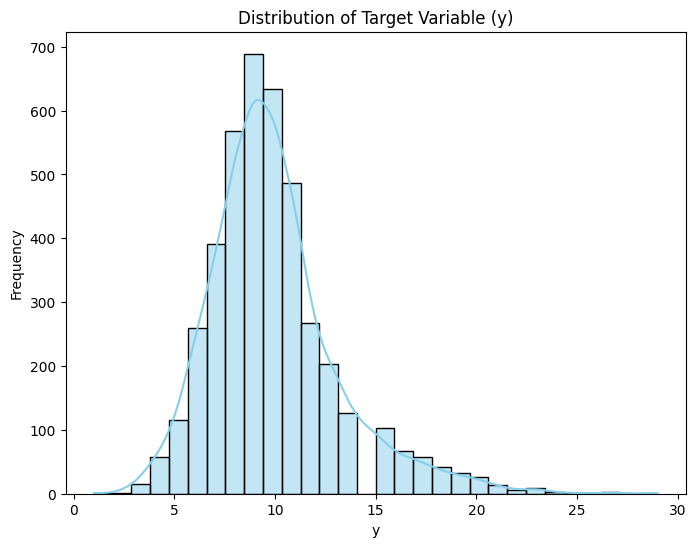

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(y, bins=30, kde=True, color='skyblue')
plt.title('Distribution of Target Variable (y)')
plt.xlabel('y')
plt.ylabel('Frequency')
plt.show()